In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("D:/Ecom_Customers.csv")

In [3]:
dataset.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dataset.isnull().sum()

Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
dataset.dtypes

Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
dataset.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Text(0.5, 1.0, 'Scatterplot')

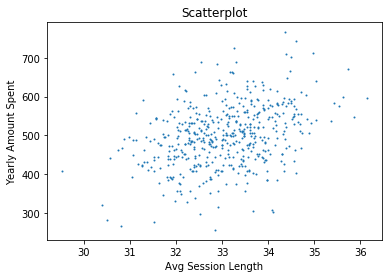

In [7]:
plt.scatter(dataset['Avg Session Length'], dataset['Yearly Amount Spent'], s= 1)
plt.xlabel("Avg Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title("Scatterplot")

Text(0.5, 1.0, 'Scatterplot')

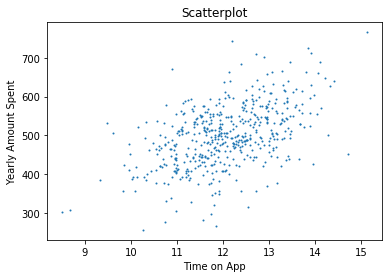

In [8]:
plt.scatter(dataset['Time on App'], dataset['Yearly Amount Spent'], s= 1)
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.title("Scatterplot")

Text(0.5, 1.0, 'Scatterplot')

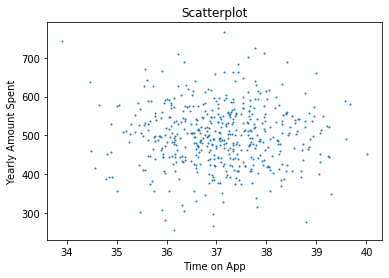

In [24]:
plt.scatter(dataset['Time on Website'], dataset['Yearly Amount Spent'], s= 1)
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.title("Scatterplot")

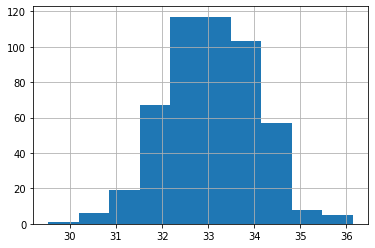

In [9]:
dataset['Avg Session Length'].hist()

In [10]:
X = dataset.drop("Yearly Amount Spent", axis = 1)

In [11]:
y = dataset["Yearly Amount Spent"]

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Training Error
import numpy as np
y_pred = regressor.predict(X_train)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Squared Error: 100.59311226566571
Root Mean Squared Error: 10.029611770435869


In [15]:
# Predicting the Test set results
# You can see that the value of root mean squared error, which is less than 10% of the mean value. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 94.55779503639945
Root Mean Squared Error: 9.724083249149992


In [16]:
regressor.intercept_

-1037.825748259512

In [17]:
regressor.coef_

array([ 2.57675297e+01,  3.88003936e+01, -1.80409314e-02,  6.18525679e+01])

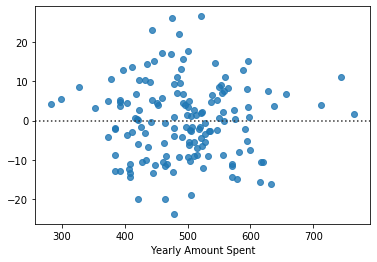

In [18]:
import seaborn
seaborn.residplot(y_test, y_pred)

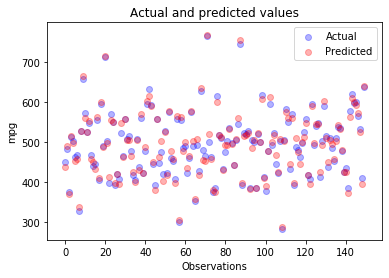

In [22]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [23]:
dataset.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000
